In [2]:
import pandas as pd
import numpy as np
import scipy as sp
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
df=pd.DataFrame(pd.read_csv('kuiper.csv', sep=';'))

In [4]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.10313,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.03608,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.84786,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.91314,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.17032,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


Данные состоят из 804 наблюдений и следующих 12 наблюдений:

Price – число - цена автомобиля

Mileage – число - пробег (в милях)

Make – номинальная -  Производитель: {'Buick', 'Cadillac', 'Chevrolet', 'Pontiac', 'SAAB', 'Saturn'}

Model – номинальная  - модель автомобиля 

Trim – номинальная - тип модели

Type – номинальная - тип автомобиля: {'Convertible', 'Coupe', 'Hatchback', 'Sedan', 'Wagon'}

Cylinder – число - количество цилиндров {4, 6, 8}

Liter – число - объем двигателя

Doors – число -  количество дверей {2,4}

Cruise – бинарная - наличие круиз-контроля ( 1 – есть, 0 – нет)

Sound – бинарная - наличие модернизированной аудиосистемы (1 - есть, 0 – нет)

Leather – бинарная - наличие кожаных сидений (1 - есть,0 – нет)

Задача - предсказать цену автомобиля, исходя из остальных признаков

Проверим, есть ли пропуски в данных:

In [5]:
pd.isnull(df).values.any()

False

Пропусков нет

In [6]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Price,804,NaN,NaN,NaN,21343.1,9884.85,8638.93,14273.1,18025,26717.3,70755.5
Mileage,804,NaN,NaN,NaN,19831.9,8196.32,266,14623.5,20913.5,25213,50387
Make,804,6,Chevrolet,320,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Model,804,32,Cavalier,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Trim,804,47,Sedan 4D,170,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,804,5,Sedan,490,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cylinder,804,NaN,NaN,NaN,5.26866,1.38753,4,4,6,6,8
Liter,804,NaN,NaN,NaN,3.03731,1.10556,1.6,2.2,2.8,3.8,6
Doors,804,NaN,NaN,NaN,3.52736,0.850169,2,4,4,4,4
Cruise,804,NaN,NaN,NaN,0.752488,0.431836,0,1,1,1,1


Визуализация признаков:

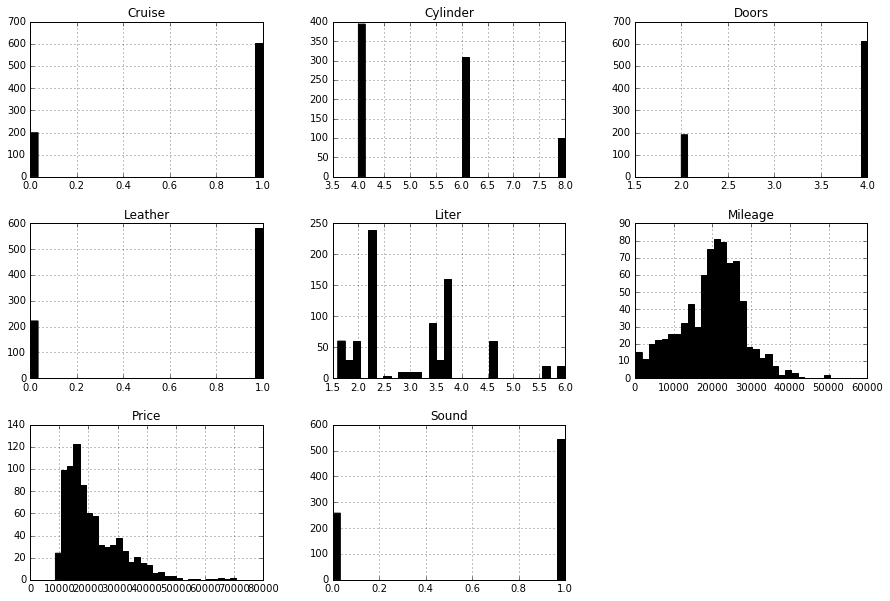

In [7]:
df.hist(color = 'k', bins = 30, figsize=(15,10))
plt.show()

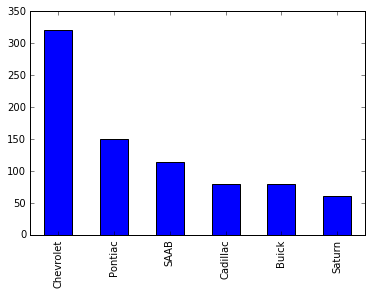

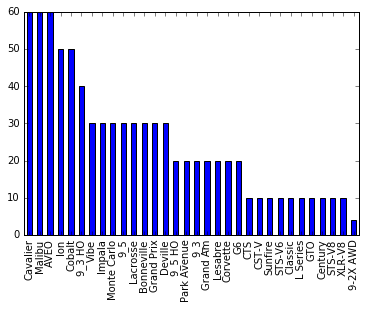

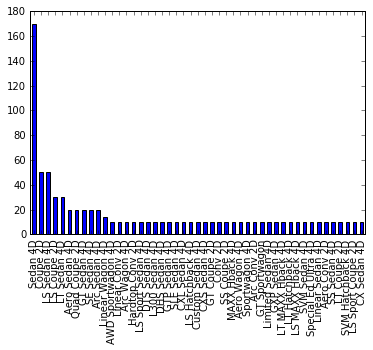

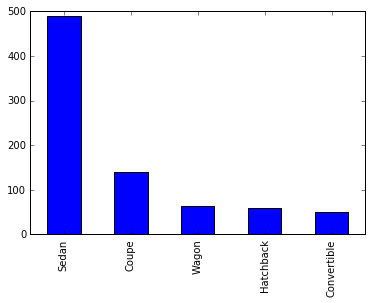

In [8]:
fig1 = plt.figure()
(df['Make'].value_counts().plot(kind='bar'))
fig2 = plt.figure()
df['Model'].value_counts().plot(kind='bar')
fig3 = plt.figure()
df['Trim'].value_counts().plot(kind='bar')
fig4 = plt.figure()
df['Type'].value_counts().plot(kind='bar')

Визуализация зависимости между небинарными признаками:

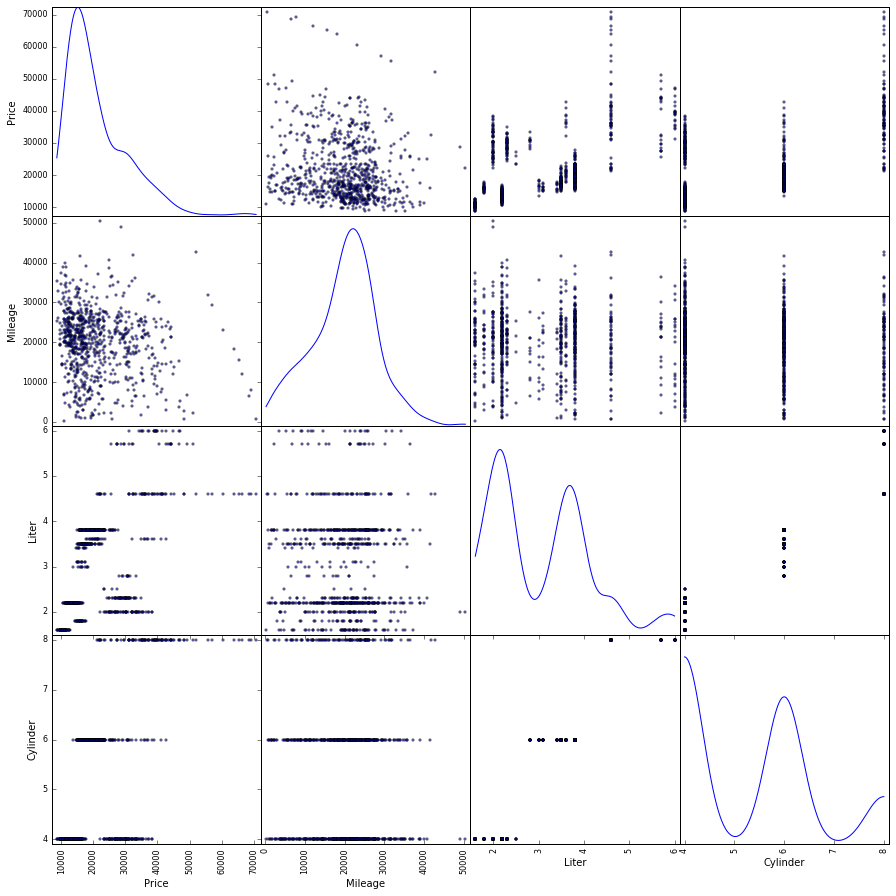

In [10]:

pd.scatter_matrix(df[['Price', 'Mileage', 'Liter', 'Cylinder']], figsize=(15, 15), diagonal='kde')
plt.show()

Добавим dummy-переменные:

In [11]:
df_make = pd.get_dummies(df['Make'])
df_model=pd.get_dummies(df['Model'])
df_trim = pd.get_dummies(df['Trim'])
df_type=pd.get_dummies(df['Type'])
df1= pd.DataFrame(pd.concat([df, df_make,df_model,df_trim,df_type], axis=1))
df1=df1.drop('Make',1)
df1=df1.drop('Model',1)
df1=df1.drop('Trim',1)
df1=df1.drop('Type',1)

In [54]:
df1.head()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather,Buick,Cadillac,...,SVM Hatchback 4D,SVM Sedan 4D,Sedan 4D,Special Ed Ultra 4D,Sportwagon 4D,Convertible,Coupe,Hatchback,Sedan,Wagon
0,17314.10313,8221,6,3.1,4,1,1,1,1,0,...,0,0,1,0,0,0,0,0,1,0
1,17542.03608,9135,6,3.1,4,1,1,0,1,0,...,0,0,1,0,0,0,0,0,1,0
2,16218.84786,13196,6,3.1,4,1,1,0,1,0,...,0,0,1,0,0,0,0,0,1,0
3,16336.91314,16342,6,3.1,4,1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
4,16339.17032,19832,6,3.1,4,1,0,1,1,0,...,0,0,1,0,0,0,0,0,1,0


Отберем наиболее важные признаки с помощью Random Forest без настройки параметров:

In [72]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df1.drop('Price',1), 
                                                    df1.Price, test_size=0.3, 
                                                    random_state=1)

In [73]:
from sklearn.ensemble import RandomForestRegressor
RFR=RandomForestRegressor(random_state=1).fit(X_train,y_train)

In [74]:
features = pd.DataFrame(RFR.feature_importances_, index=X_train.columns, 
                        columns=['Importance']).sort_values(['Importance'], ascending=False)
features

,Importance
Liter,4.127426e-01
SAAB,1.784012e-01
Cadillac,1.257363e-01
Cylinder,1.018409e-01
Hardtop Conv 2D,5.369362e-02
XLR-V8,3.019220e-02
Mileage,2.860256e-02
Pontiac,2.327930e-02
Doors,8.963547e-03
Convertible,3.808225e-03


Выберем  10 признаков с наибольшей важностью. Посчитаем корреляции между признаками.

In [75]:
cor=abs(pd.DataFrame(df1[['Liter','Cadillac','SAAB',
            'Cylinder','Hardtop Conv 2D','XLR-V8','Mileage','Pontiac','Doors','Convertible']].corr()))
cor

,Liter,Cadillac,SAAB,Cylinder,Hardtop Conv 2D,XLR-V8,Mileage,Pontiac,Doors,Convertible
Liter,1.000000,0.406216,0.326754,0.957897,0.158726,0.158726,0.018641,0.113863,0.079259,0.065886
Cadillac,0.406216,1.000000,0.135115,0.534896,0.337609,0.337609,0.037472,0.159196,0.087104,0.086456
SAAB,0.326754,0.135115,1.000000,0.371877,0.045616,0.045616,0.056182,0.194664,0.025680,0.338253
Cylinder,0.957897,0.534896,0.371877,1.000000,0.221052,0.221052,0.029461,0.114436,0.002206,0.061533
Hardtop Conv 2D,0.158726,0.337609,0.045616,0.221052,1.000000,1.000000,0.014597,0.053746,0.201742,0.435803
XLR-V8,0.158726,0.337609,0.045616,0.221052,1.000000,1.000000,0.014597,0.053746,0.201742,0.435803
Mileage,0.018641,0.037472,0.056182,0.029461,0.014597,0.014597,1.000000,0.029892,0.016944,0.027436
Pontiac,0.113863,0.159196,0.194664,0.114436,0.053746,0.053746,0.029892,1.000000,0.040943,0.123326
Doors,0.079259,0.087104,0.025680,0.002206,0.201742,0.201742,0.016944,0.040943,1.000000,0.462921
Convertible,0.065886,0.086456,0.338253,0.061533,0.435803,0.435803,0.027436,0.123326,0.462921,1.000000


Удалим признак 'Cylinder', так как его корреляция с признаком 'Liter' равна 0,95, что говорит о линейной зависимости признаков.

In [76]:
X_train=X_train[['Liter','Cadillac','SAAB','Hardtop Conv 2D','XLR-V8','Mileage','Pontiac','Convertible','Doors']]
X_test=X_test[['Liter','Cadillac','SAAB','Hardtop Conv 2D','XLR-V8','Mileage','Pontiac','Convertible','Doors']]
X=pd.concat([X_train,X_test])
y=pd.concat([y_train,y_test])

Построим 3 модели: линейную регрессию, дерево решений и Random Forest

In [77]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [78]:
r2_score(y_test,LR.predict(X_test))

0.93620695902594486

Близкий к единице $R^2$ говорит о сильной линейной зависимости между компонентами, такая модель достаточно хорошо предсказывает цену автомобиля 

Теперь построим дерево решений. Настроим оптимальную глубину дерева с помощью сравнения параметров $R^2$ для разных параметров от 1 до 50

In [82]:
test_MSE={}
from sklearn import tree
for i in range(50):
    regr = tree.DecisionTreeRegressor(max_depth=i+1)
    regr.fit(X_train, y_train)
    test_MSE[i+1]=(r2_score(y_test, regr.predict(X_test)))

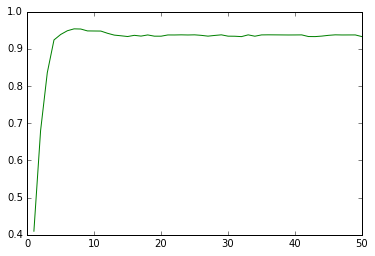

In [83]:
plt.figure()
x = [j for j in range(1,51)]
y1 = list(test_MSE.values())
plt.plot(x, y1, color='g')
plt.show()

In [86]:
a=max(test_MSE, key=test_MSE.get)
print(a)
print(test_MSE[a])

7
0.953605187029


Оптимальной оказалась глубина дерева, равная 7, она даёт показатель $R^2$, равный 0.95, что выше, чем при линейной регрессии

Теперь используем алгоритм Random Forest. Оптимальное количество деревьев определим оценкой $R^2$ для каждого значения на кросс-валидации.

In [87]:
from sklearn.metrics import r2_score
from sklearn.cross_validation import KFold, cross_val_score

cr_val=KFold(X.shape[0], shuffle=True)
result={}
for i in range(1,50):
    RFR=RandomForestRegressor(n_estimators=i, random_state=1)
    res=cross_val_score(RFR, X, y, cv=cr_val, scoring ='r2').mean()
    result[i]=res

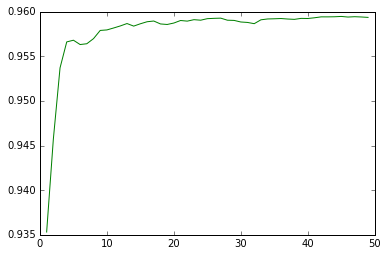

In [88]:
plt.figure()
x = [j for j in range(1,50)]
y3 = list(result.values())
plt.plot(x, y3, color='g')
plt.show()

In [89]:
b=max(result, key=result.get)
print(b)
print(result[b])

45
0.959458600941


Оптимальным количеством дервьев оказалось 45. Эта модель показала наибольшее значение $R^2$, поэтому ее можно считать наилучшей для предсказания данных.

Итак, для построения модели были использованы признаки: объем двигателя; пробег; количество дверей; бинарные переменные - есть ли у автомобиля откидной верх; является ли производитель Cadillac, SAAB и Pontiac; является ли модель XLR-V8; является ли тим модели Hardtop Conv 2D. Все 3 модели показали хорошую предсказательную силу, но наилучшей оказался Random Forest с 45 деревьями.